In [1]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set_context('notebook')
import pystan
import stan_utility
import plotting_functions as hierplot
import arviz as az
import patsy
import os
import warnings
warnings.simplefilter('ignore')#removes annoying deprecation warnings
plt.style.use('seaborn-poster')

order = ["Accuracy","Speed"]
df = pd.read_csv('trimmed_data.csv')
df = df[df.exp==2]
df = df[df.trialType == 'SA']#select trials with single activity only, following analysis are therefore based on these trials only

/home/gabriel/anaconda3/envs/pystan/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/gabriel/anaconda3/envs/pystan/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


## Checking trimmed data

In [3]:
dfFull = pd.read_csv('MRK_SAT.csv')
dfFull = dfFull[dfFull.exp==2]

No response :

In [4]:
float(len(dfFull.rt) - len(dfFull[dfFull.trialType != "NR"].rt))/len(dfFull.rt) 

0.009572723765432098

No available EMG and multiple activity trials :

In [17]:
float(len(dfFull[dfFull.trialType != "NR"].rt) - len(dfFull[(dfFull.trialType == "SA")].rt))/ len(dfFull[dfFull.trialType != "NR"].rt)

0.14183810103469263

Fast guesses exclusion by EWMA :

In [18]:
float(len(dfFull[(dfFull.trialType == "SA")].rt) - len(df)) / len(dfFull[(dfFull.trialType == "SA")].rt)

0.07035660586115919

# LME on RT PMT and MT

In [45]:
RT_fit = az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/RT_Exp2_fit.nc')
PMT_fit =  az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/PMT_Exp2_fit.nc')
MT_fit =  az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/MT_Exp2_fit.nc')

In [61]:
az.summary(RT_fit, var_names=["raw_intercept","raw_beta"], round_to=0, credible_interval=.95)[["mean","sd","hpd_2.5%", "hpd_97.5%"]]#.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &   mean &    sd &  hpd\\_2.5\\% &  hpd\\_97.5\\% \\\\\n\\midrule\nraw\\_intercept &  449.0 &  29.0 &     393.0 &      511.0 \\\\\nraw\\_beta[0]   &  160.0 &  27.0 &     108.0 &      213.0 \\\\\nraw\\_beta[1]   &  -94.0 &  12.0 &    -118.0 &      -70.0 \\\\\nraw\\_beta[2]   &    9.0 &   7.0 &      -5.0 &       24.0 \\\\\nraw\\_beta[3]   &    3.0 &   8.0 &     -14.0 &       19.0 \\\\\nraw\\_beta[4]   &  -74.0 &   8.0 &     -91.0 &      -58.0 \\\\\nraw\\_beta[5]   &   77.0 &  13.0 &      53.0 &      102.0 \\\\\nraw\\_beta[6]   &   14.0 &  13.0 &      -9.0 &       40.0 \\\\\nraw\\_beta[7]   &  142.0 &  27.0 &      92.0 &      200.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

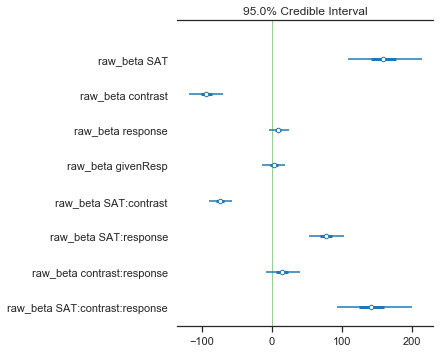

In [56]:
g = az.plot_forest(RT_fit, var_names="raw_beta", credible_interval=0.95, 
                   combined=True, rope=[0,0])
plt.show()


In [62]:
az.summary(PMT_fit, var_names=["raw_intercept","raw_beta"], round_to=0, credible_interval=.95)[["mean","sd","hpd_2.5%", "hpd_97.5%"]]#.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &   mean &    sd &  hpd\\_2.5\\% &  hpd\\_97.5\\% \\\\\n\\midrule\nraw\\_intercept &  368.0 &  26.0 &     319.0 &      417.0 \\\\\nraw\\_beta[0]   &  152.0 &  27.0 &     100.0 &      206.0 \\\\\nraw\\_beta[1]   &  -82.0 &  11.0 &    -104.0 &      -60.0 \\\\\nraw\\_beta[2]   &   -3.0 &   7.0 &     -16.0 &       12.0 \\\\\nraw\\_beta[3]   &    1.0 &   6.0 &     -11.0 &       13.0 \\\\\nraw\\_beta[4]   &  -72.0 &   8.0 &     -88.0 &      -55.0 \\\\\nraw\\_beta[5]   &   82.0 &  14.0 &      55.0 &      110.0 \\\\\nraw\\_beta[6]   &   -5.0 &  12.0 &     -28.0 &       19.0 \\\\\nraw\\_beta[7]   &  158.0 &  30.0 &     100.0 &      218.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

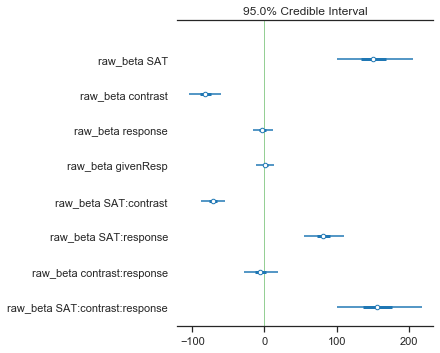

In [58]:
g = az.plot_forest(PMT_fit, var_names="raw_beta", credible_interval=0.95, 
                   combined=True, rope=[0,0])
plt.show()


In [63]:
az.summary(MT_fit, var_names=["raw_intercept","raw_beta"], round_to=0, credible_interval=.95)[["mean","sd","hpd_2.5%", "hpd_97.5%"]]#.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &  mean &   sd &  hpd\\_2.5\\% &  hpd\\_97.5\\% \\\\\n\\midrule\nraw\\_intercept &  72.0 &  5.0 &      63.0 &       83.0 \\\\\nraw\\_beta[0]   &  10.0 &  2.0 &       5.0 &       14.0 \\\\\nraw\\_beta[1]   &  -6.0 &  1.0 &      -7.0 &       -4.0 \\\\\nraw\\_beta[2]   &   5.0 &  1.0 &       4.0 &        7.0 \\\\\nraw\\_beta[3]   &   0.0 &  3.0 &      -5.0 &        6.0 \\\\\nraw\\_beta[4]   &   1.0 &  1.0 &      -1.0 &        3.0 \\\\\nraw\\_beta[5]   &  -3.0 &  1.0 &      -5.0 &       -0.0 \\\\\nraw\\_beta[6]   &   9.0 &  1.0 &       6.0 &       12.0 \\\\\nraw\\_beta[7]   &  -5.0 &  2.0 &      -9.0 &       -1.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

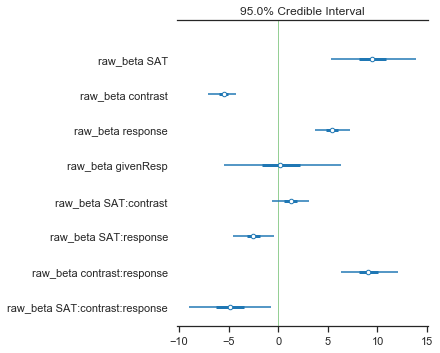

In [60]:
g = az.plot_forest(MT_fit, var_names="raw_beta", credible_interval=0.95, 
                   combined=True, rope=[0,0])
plt.show()


# GLME on precision

In [2]:
Precision_fit = az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/Precision_Exp2_fit.nc')

In [6]:
az.summary(Precision_fit, var_names=["raw_intercept","raw_beta"], round_to=2, credible_interval=.95)[["mean","sd","hpd_2.5%", "hpd_97.5%"]]#.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &  mean &    sd &  hpd\\_2.5\\% &  hpd\\_97.5\\% \\\\\n\\midrule\nraw\\_intercept &  0.75 &  0.06 &      0.63 &       0.86 \\\\\nraw\\_beta[0]   &  0.12 &  0.03 &      0.07 &       0.18 \\\\\nraw\\_beta[1]   &  0.18 &  0.03 &      0.13 &       0.23 \\\\\nraw\\_beta[2]   & -0.01 &  0.03 &     -0.07 &       0.05 \\\\\nraw\\_beta[3]   &  0.17 &  0.04 &      0.10 &       0.25 \\\\\n\\bottomrule\n\\end{tabular}\n'

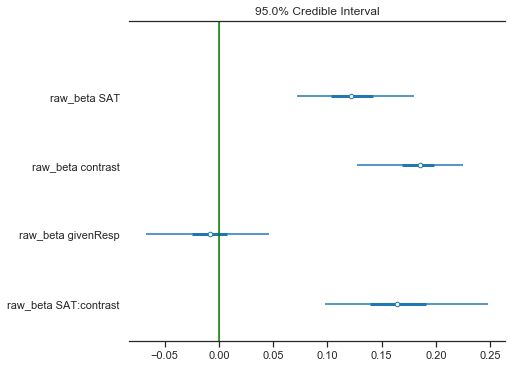

In [3]:
g = az.plot_forest(Precision_fit, var_names="raw_beta", credible_interval=0.95, 
                   combined=True, figsize=(7,5), rope=(0,0))
plt.vlines(0, -1, 10, 'g')
plt.show()


# Plotting raw effects on RT, PMT and MT

In [139]:
fulldf = pd.read_csv('trimmed_data.csv')
fulldf = fulldf[fulldf.exp == 1] 
fulldf = fulldf.append(df)#SA uniquement pour expe 2

In [140]:
def std_within(df, dv, cond,unit):#Normalize according to cousineau's method, not really optimized...
    for i, con_dat in df.groupby(cond):
        grd_avrg = con_dat[dv].mean()
        for xx, sub_dat in con_dat.groupby(unit):
            sub_avrg = sub_dat[dv].mean()
            sub_dat['corrected'] = sub_dat.apply(lambda row: row[dv] - sub_avrg + grd_avrg, axis=1)
            df.loc[(df[cond[0]]==i[0])&(df[cond[1]]==i[1])&(df[unit]==xx), 'corrected%s' %dv]  = sub_dat['corrected']
std_within(fulldf,'mt',['condition','contraste'],'participant')
std_within(fulldf,'pmt',['condition','contraste'],'participant')
std_within(fulldf,'rt',['condition','contraste'],'participant')

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [142]:
fulldf['Response'] = fulldf.apply(lambda row: 'Correct' if row['response']==1 else 'Incorrect', axis = 1)

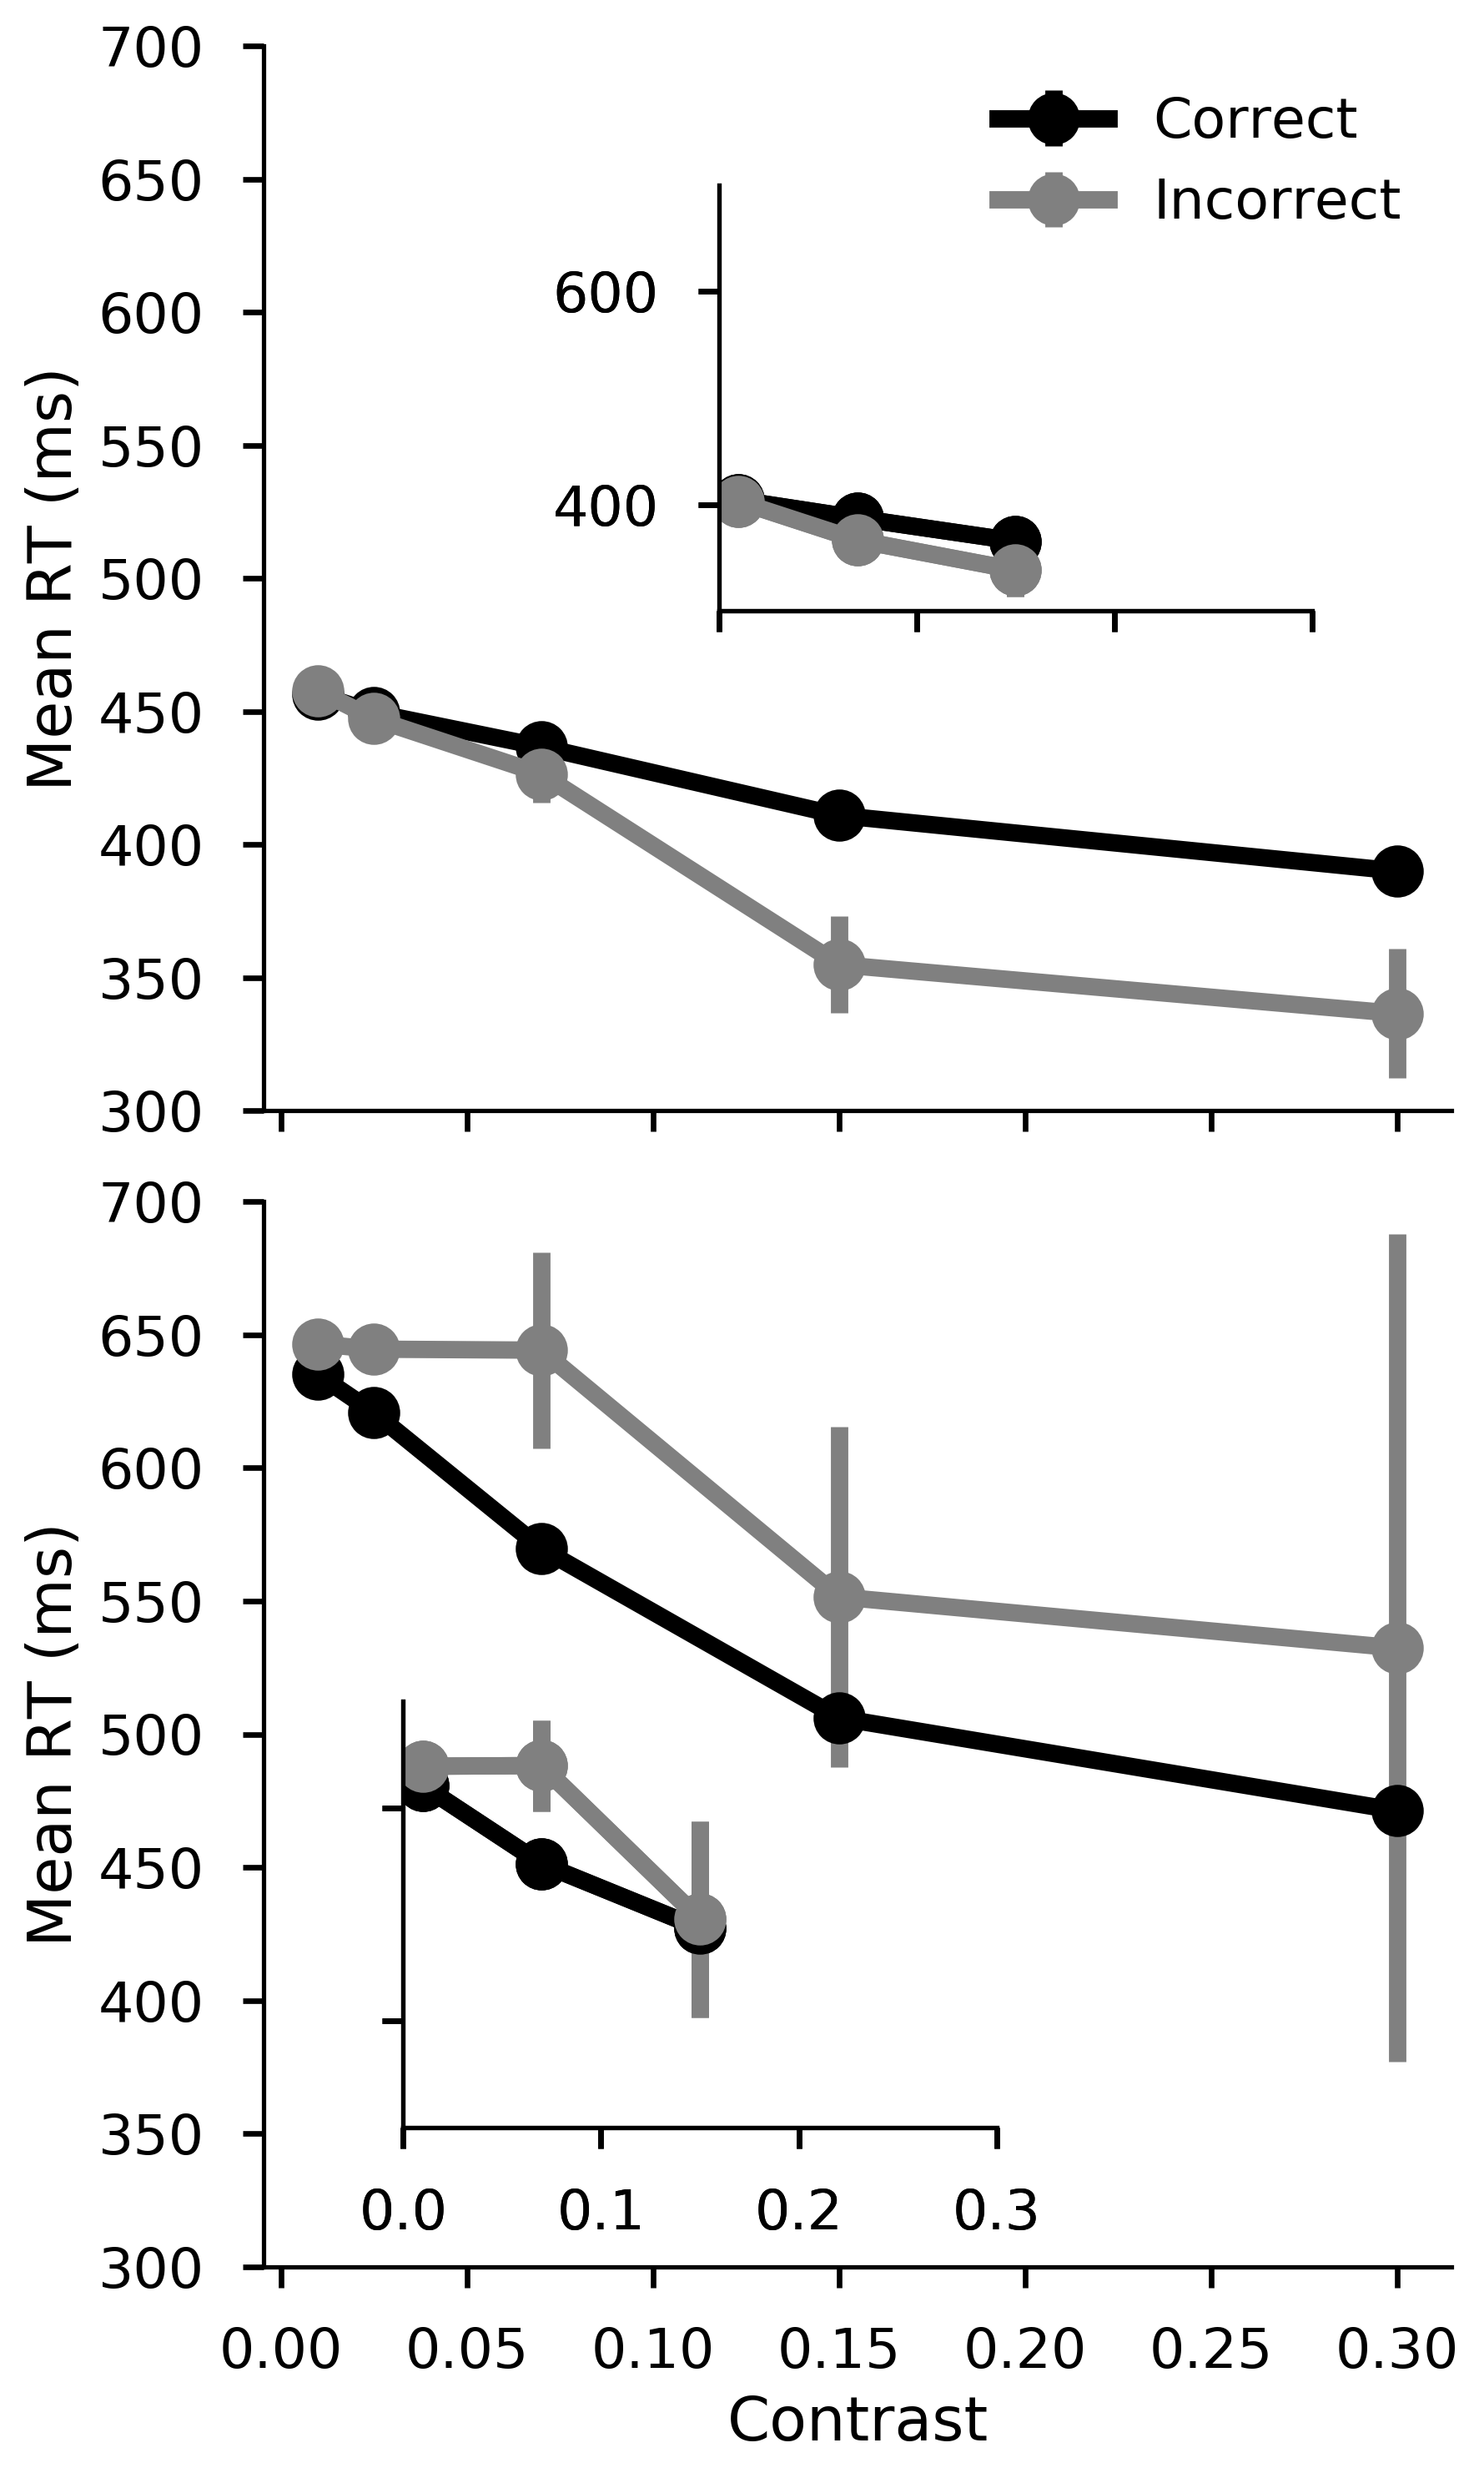

In [163]:
fig, axes = plt.subplots(2,1,figsize=(6,10), dpi=300,sharex=True,sharey=True)
SATdict = {"Speed":0, "Accuracy":1}
corrdict= {"Incorrect":"gray", 'Correct':"k"}
for cell, celldat in fulldf[fulldf.exp==1].groupby(['condition','Response']):
    SAT = cell[0]
    ax = axes[SATdict[SAT]]
    group = celldat.groupby(["participant","contraste"]).mean().groupby('contraste')
    ax.errorbar(x = group.mean().index, y=group.mean().rt, yerr=group.sem().correctedrt*1.96, color=corrdict[cell[1]], 
                                marker="o",lw=5,ms=15,label=cell[1])  
    if SAT == "Accuracy":
        axins = inset_axes(ax,  "50%", "40%" ,loc="lower left", borderpad=2.5)
    else :
        axins = inset_axes(ax,  "50%", "40%" ,loc="upper right", borderpad=2.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for subcell, subcelldat in fulldf[(fulldf.exp==2) & (fulldf.condition == SAT)].groupby(['Response']):
        group = subcelldat.groupby(["participant","contraste"]).mean().groupby('contraste')
        axins.errorbar(x = group.mean().index, y=group.mean().rt, yerr=group.sem().correctedrt*1.96, color=corrdict[subcell],
                                marker="o",lw=5,ms=15)  
        axins.spines['right'].set_visible(False)
        axins.spines['top'].set_visible(False)
        axins.set_ylim(300, 700)
        axins.set_xlim(0, .3)
        axins.patch.set_visible(False) 
        if SAT == "Speed":
            axins.tick_params(axis='x',which='both',bottom=True, top=False, labelbottom=False)
        else:
            axins.tick_params(axis='y',which='both',left=True, right=False, labelleft=False)
axes[0].legend(loc='upper right', frameon=False)
axes[0].set_ylabel('Mean RT (ms)')
axes[1].set_xlabel('Contrast')
axes[1].set_ylabel('Mean RT (ms)')
axes[1].set_ylim (300, 700)
plt.tight_layout()
plt.savefig('../Manuscript/plots/factorRT.png')


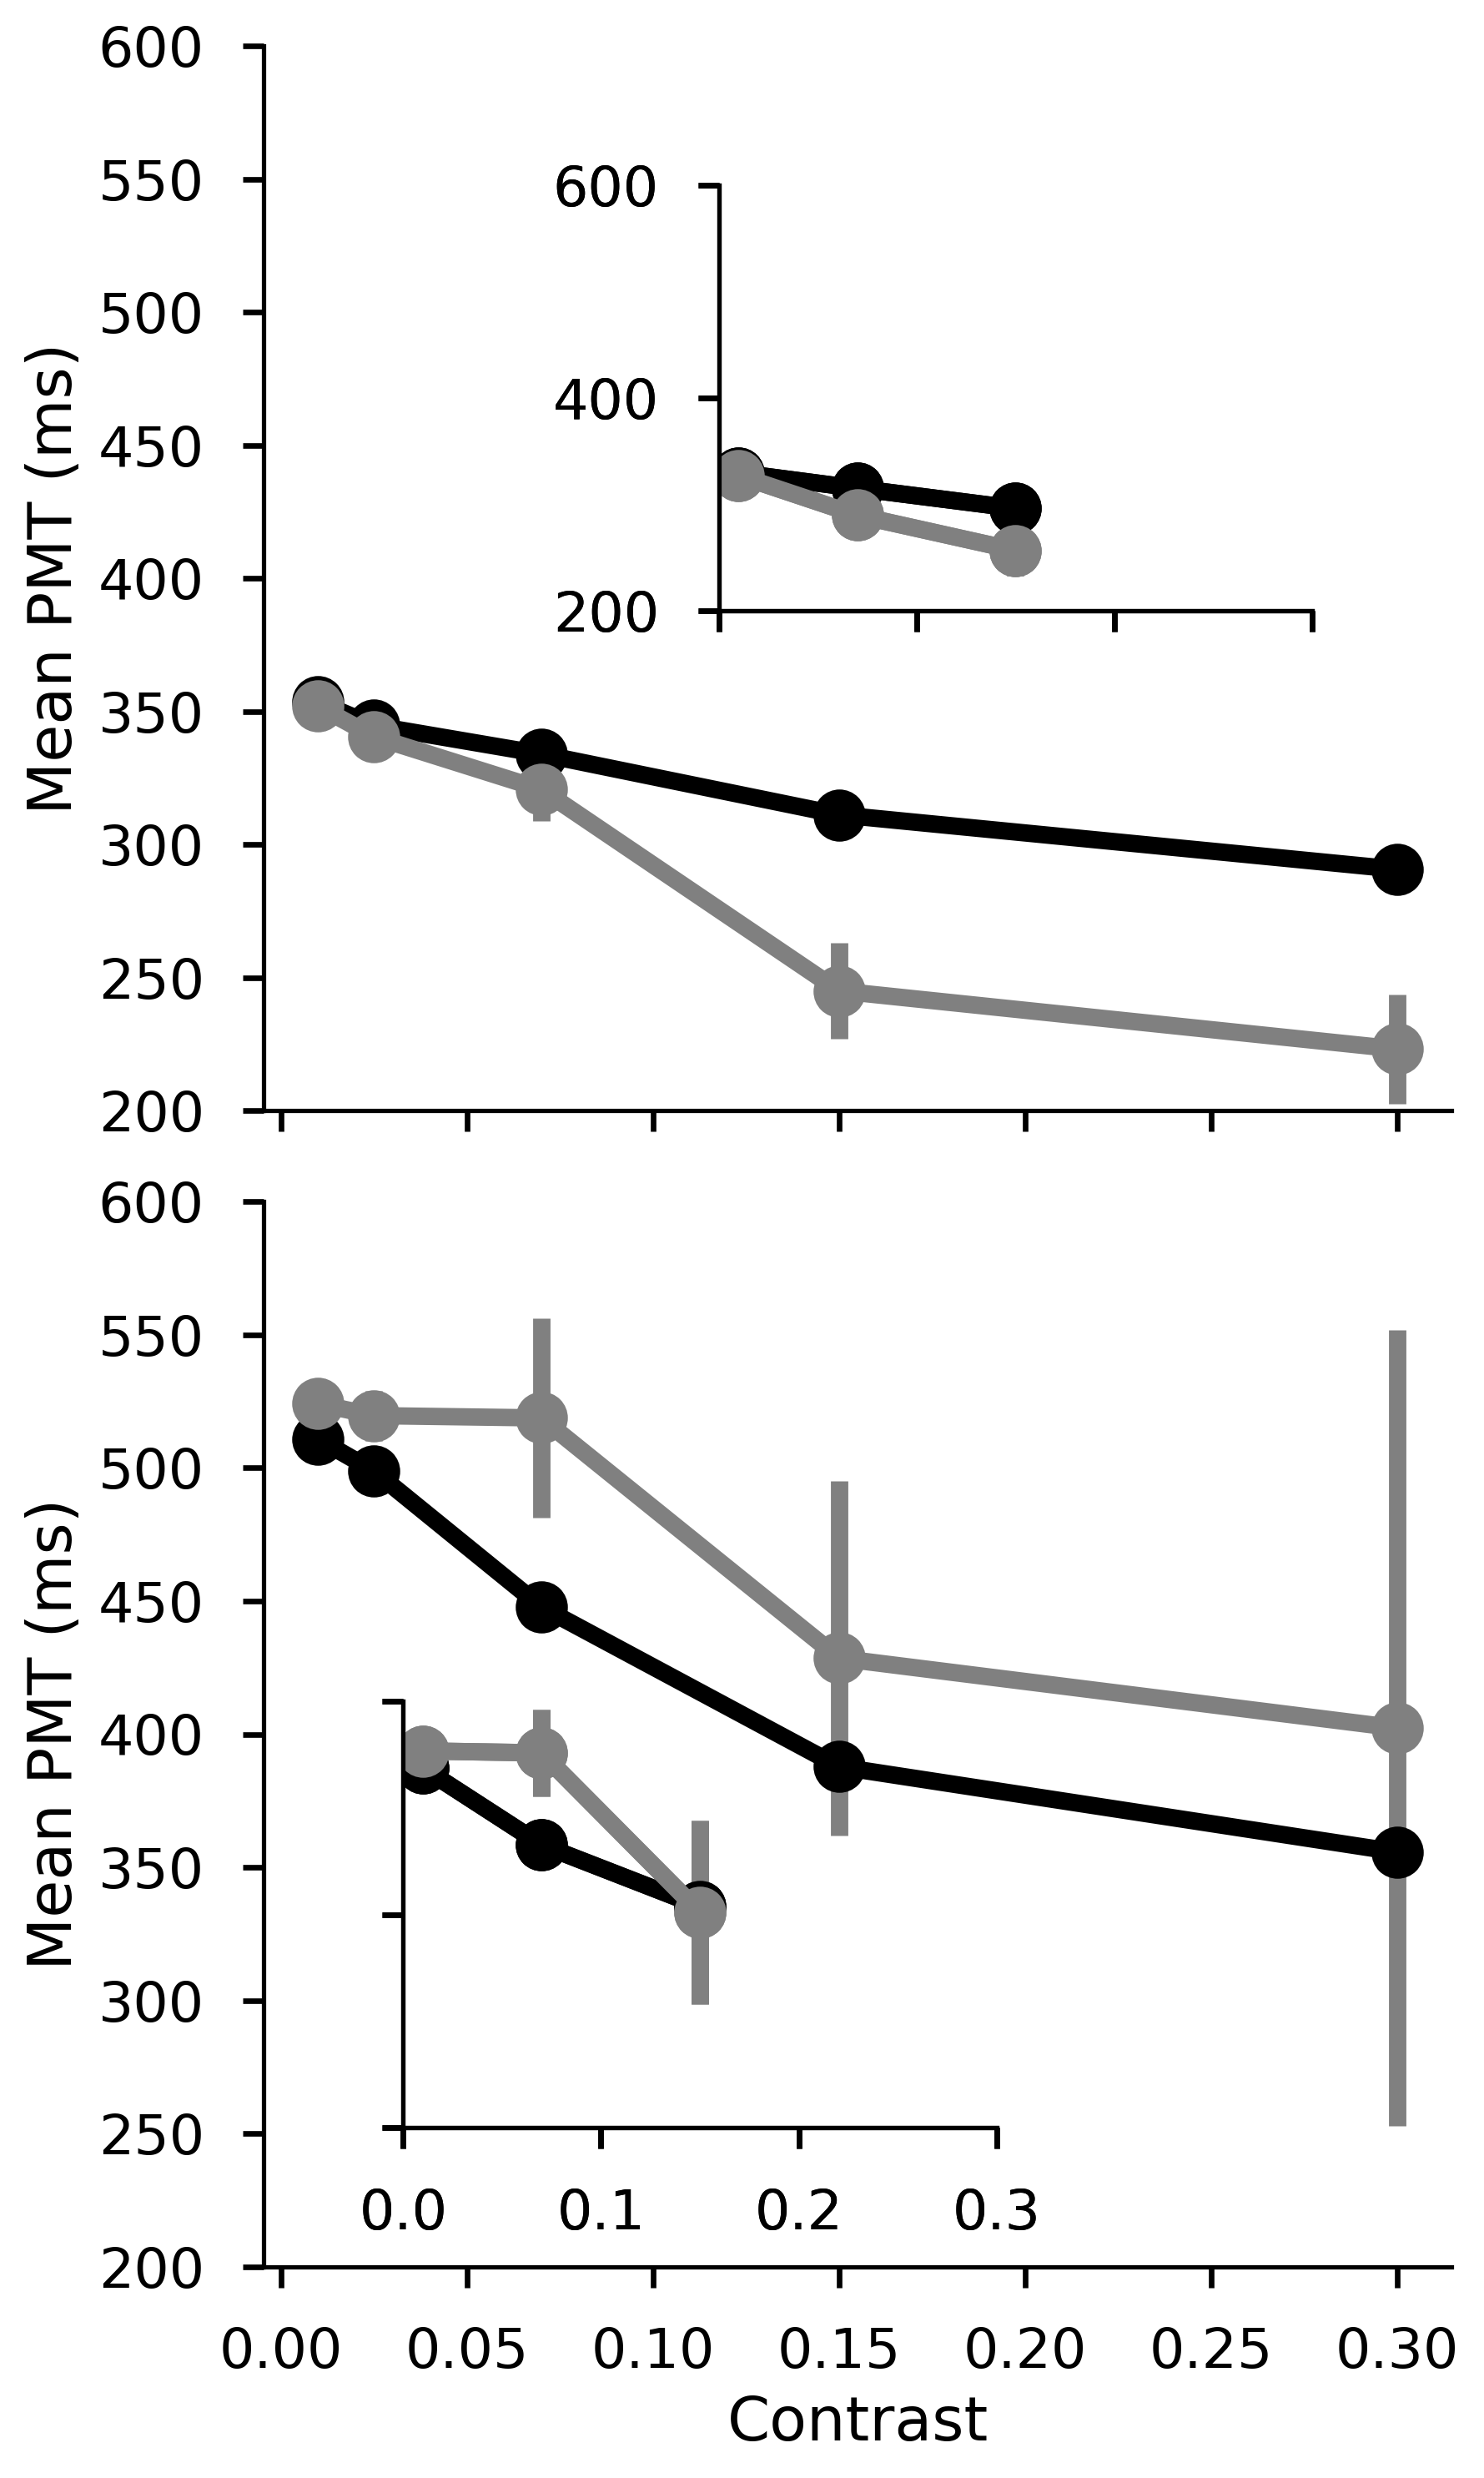

In [162]:
fig, axes = plt.subplots(2,1,figsize=(6,10), dpi=300,sharex=True,sharey=True)
SATdict = {"Speed":0, "Accuracy":1}
corrdict= {"Incorrect":"gray", 'Correct':"k"}
for cell, celldat in fulldf[fulldf.exp==1].groupby(['condition','Response']):
    SAT = cell[0]
    ax = axes[SATdict[SAT]]
    group = celldat.groupby(["participant","contraste"]).mean().groupby('contraste')
    ax.errorbar(x = group.mean().index, y=group.mean().pmt, yerr=group.sem().correctedpmt*1.96, color=corrdict[cell[1]], 
                                marker="o",lw=5,ms=15,label=cell[1])  
    if SAT == "Accuracy":
        axins = inset_axes(ax,  "50%", "40%" ,loc="lower left", borderpad=2.5)
    else :
        axins = inset_axes(ax,  "50%", "40%" ,loc="upper right", borderpad=2.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for subcell, subcelldat in fulldf[(fulldf.exp==2) & (fulldf.condition == SAT)].groupby(['Response']):
        group = subcelldat.groupby(["participant","contraste"]).mean().groupby('contraste')
        axins.errorbar(x = group.mean().index, y=group.mean().pmt, yerr=group.sem().correctedpmt*1.96, color=corrdict[subcell],
                                marker="o",lw=5,ms=15)  
        axins.spines['right'].set_visible(False)
        axins.spines['top'].set_visible(False)
        axins.set_ylim(200, 600)
        axins.set_xlim(0, .3)
        axins.patch.set_visible(False) 
        if SAT == "Speed":
            axins.tick_params(axis='x',which='both',bottom=True, top=False, labelbottom=False)
        else:
            axins.tick_params(axis='y',which='both',left=True, right=False, labelleft=False)
axes[0].set_ylabel('Mean PMT (ms)')
axes[1].set_xlabel('Contrast')
axes[1].set_ylabel('Mean PMT (ms)')
axes[1].set_ylim (200, 600)
plt.tight_layout()
plt.savefig('../Manuscript/plots/factorPMT.png')


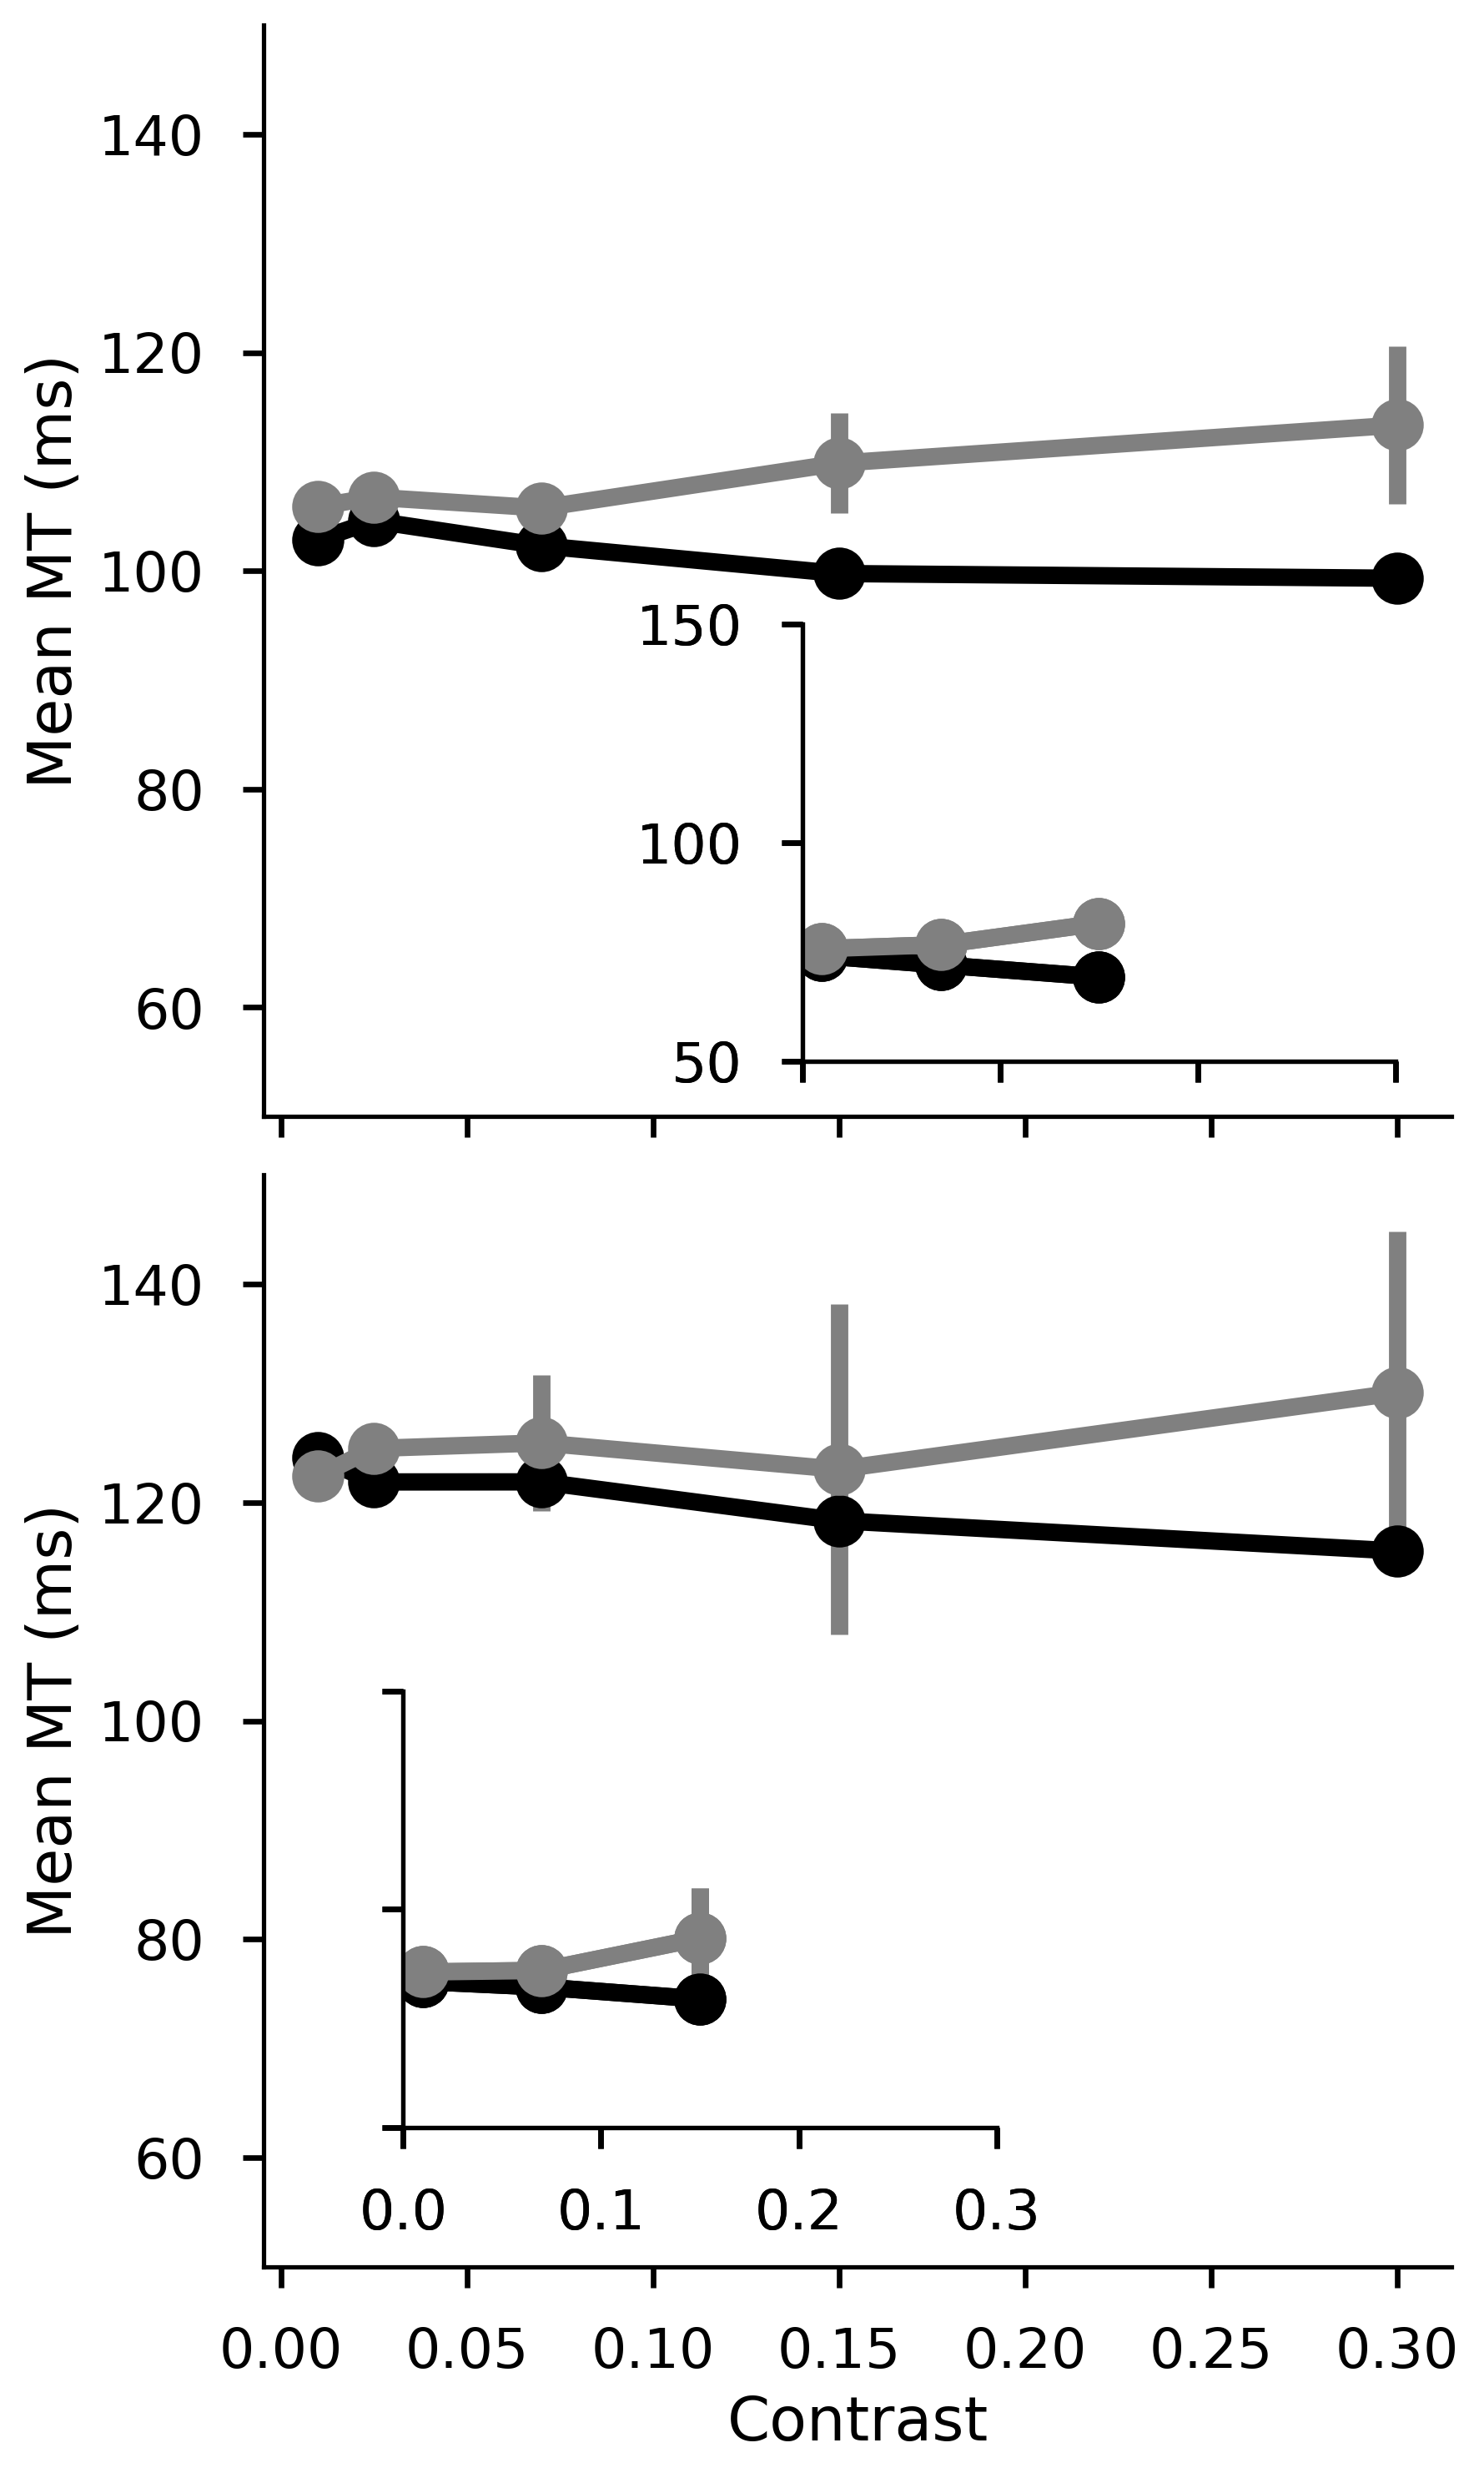

In [165]:
fig, axes = plt.subplots(2,1,figsize=(6,10), dpi=300,sharex=True,sharey=True)
SATdict = {"Speed":0, "Accuracy":1}
corrdict= {"Incorrect":"gray", 'Correct':"k"}
for cell, celldat in fulldf[fulldf.exp==1].groupby(['condition','Response']):
    SAT = cell[0]
    ax = axes[SATdict[SAT]]
    group = celldat.groupby(["participant","contraste"]).mean().groupby('contraste')
    ax.errorbar(x = group.mean().index, y=group.mean().mt, yerr=group.sem().correctedmt*1.96, color=corrdict[cell[1]], 
                                marker="o",lw=5,ms=15,label=cell[1])  
    if SAT == "Accuracy":
        axins = inset_axes(ax,  "50%", "40%" ,loc="lower left", borderpad=2.5)
    else :
        axins = inset_axes(ax,  "50%", "40%" ,loc="lower right", borderpad=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for subcell, subcelldat in fulldf[(fulldf.exp==2) & (fulldf.condition == SAT)].groupby(['Response']):
        group = subcelldat.groupby(["participant","contraste"]).mean().groupby('contraste')
        axins.errorbar(x = group.mean().index, y=group.mean().mt, yerr=group.sem().correctedmt*1.96, color=corrdict[subcell],
                                marker="o",lw=5,ms=15)  
        axins.spines['right'].set_visible(False)
        axins.spines['top'].set_visible(False)
        axins.set_ylim(50, 150)
        axins.set_xlim(0, .3)
        axins.patch.set_visible(False) 
        if SAT == "Speed":
            axins.tick_params(axis='x',which='both',bottom=True, top=False, labelbottom=False)
        else:
            axins.tick_params(axis='y',which='both',left=True, right=False, labelleft=False)
axes[0].set_ylabel('Mean MT (ms)')
axes[1].set_xlabel('Contrast')
axes[1].set_ylabel('Mean MT (ms)')
axes[1].set_ylim (50, 150)
plt.tight_layout()
plt.savefig('../Manuscript/plots/factorMT.png')


## Combining exp1 and exp2 LME plot

In [7]:
RT_fit1 = az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/RT_Exp1_fit.nc')
PMT_fit1 =  az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/PMT_Exp1_fit.nc')
MT_fit1 =  az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/MT_Exp1_fit.nc')

In [39]:
RT_fit.posterior.coords["b"] = ["SAT", "Contrast", "Correctness", "Resp. Side", r"SAT $\times$ Contrast",
                                r"SAT $\times$ Corr.", r"Contr. $\times$ Corr.", r"SAT $\times$ Contr. $\times$ Corr."]
RT_fit1.posterior.coords["b"] = ["SAT", "Contrast", "Correctness", "Resp. Side", r"SAT $\times$ Contrast",
                                r"SAT $\times$ Corr.", r"Contr. $\times$ Corr.", r"SAT $\times$ Contr. $\times$ Corr."]

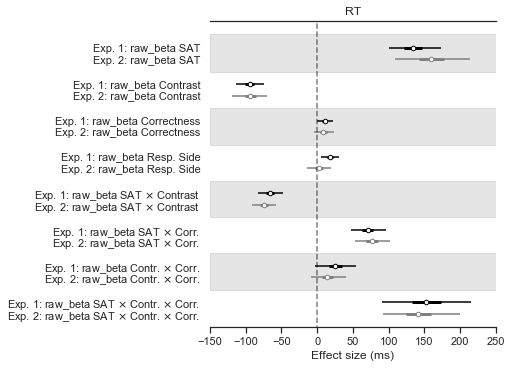

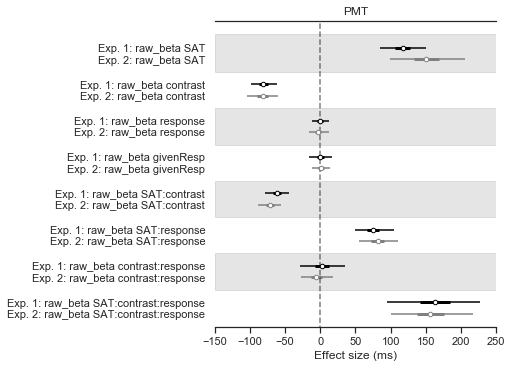

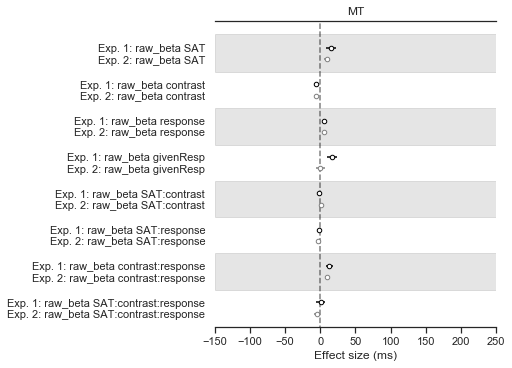

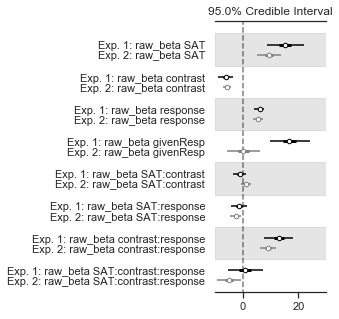

In [42]:
g = az.plot_forest([RT_fit1, RT_fit], model_names=["Exp. 1", "Exp. 2"], var_names="raw_beta", 
                   credible_interval=0.95, combined=True, rope=None, figsize=(7,5), colors=('k', 'gray'))
plt.vlines(0, -1, 13, ls="--", alpha=.5)
plt.xlim(-150, 250)
plt.xlabel('Effect size (ms)')
plt.title('RT')
plt.savefig("../Manuscript/plots/LMERT.png", dpi=300)
g = az.plot_forest([PMT_fit1, PMT_fit], model_names=["Exp. 1", "Exp. 2"], var_names="raw_beta", 
                   credible_interval=0.95, combined=True, rope=None, figsize=(7,5), colors=('k', 'gray'))
plt.vlines(0, -1, 13, ls="--", alpha=.5)
plt.xlim(-150, 250)
plt.xlabel('Effect size (ms)')
plt.title('PMT')
plt.savefig("../Manuscript/plots/LMEPMT.png", dpi=300)
g = az.plot_forest([MT_fit1, MT_fit], model_names=["Exp. 1", "Exp. 2"], var_names="raw_beta", 
                   credible_interval=0.95, combined=True, rope=None, figsize=(7,5), colors=('k', 'gray'))
plt.vlines(0, -1, 13, ls="--", alpha=.5)
plt.xlim(-150, 250)
plt.xlabel('Effect size (ms)')
plt.title('MT')
plt.savefig("../Manuscript/plots/LMEMT.png", dpi=300)
g = az.plot_forest([MT_fit1, MT_fit], model_names=["Exp. 1", "Exp. 2"], var_names="raw_beta", 
                   credible_interval=0.95, combined=True, rope=None, figsize=(2,5), colors=('k', 'gray'))
plt.vlines(0, -1, 13, ls="--", alpha=.5)
plt.xlim(-10, 30)
plt.savefig("../Manuscript/plots/LMEMTzoom.png", dpi=300)
plt.show()


# Frequentist replication

In [ ]:
%load_ext rpy2.ipython

/home/gabriel/anaconda3/envs/decomp/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Le chargement a nécessité le package : Matrix

  warnings.warn(x, RRuntimeWarning)
/home/gabriel/anaconda3/envs/decomp/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Le chargement a nécessité le package : carData

  warnings.warn(x, RRuntimeWarning)
/home/gabriel/anaconda3/envs/decomp/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: boundary (singular) fit: see ?isSingular

  warnings.warn(x, RRuntimeWarning)


Linear mixed model fit by REML ['lmerMod']
Formula: logrt ~ contraste.c * sResponse * SATcoded + GRcoded + (contraste.c *  
    sResponse * SATcoded + GRcoded | participant)
   Data: df1

REML criterion at convergence: 7092.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3993 -0.6709 -0.1349  0.5330  4.5583 

Random effects:
 Groups      Name                           Variance Std.Dev. Corr             
 participant (Intercept)                    0.041740 0.20430                   
             contraste.c                    0.003131 0.05595   0.08            
             sResponse                      0.002791 0.05283   0.34 -0.40      
             SATcoded                       0.025386 0.15933   0.08  0.38 -0.01
             GRcoded                        0.003191 0.05649   0.10 -0.02  0.47
             contraste.c:sResponse          0.003392 0.05824   0.30 -0.10  0.93
             contraste.c:SATcoded           0.001063 0.03260   0.14 -0.30  0.10
             sR

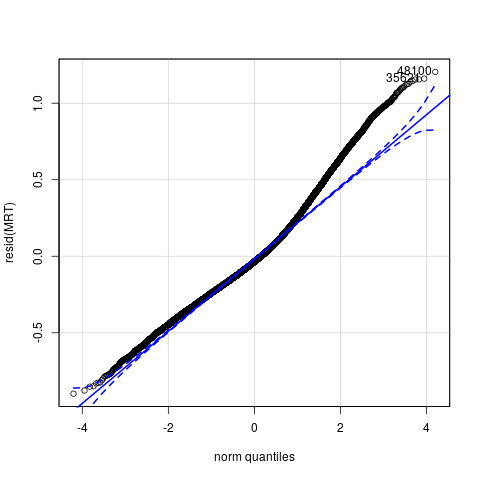

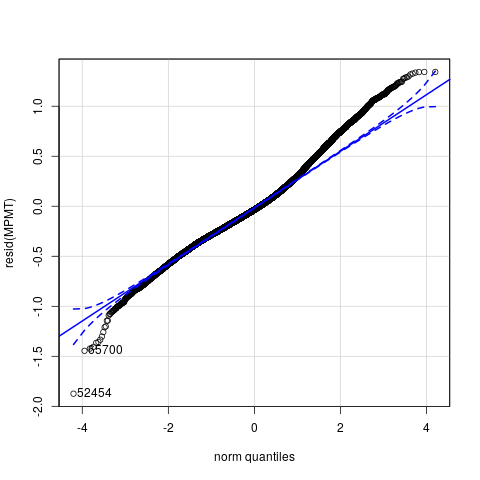

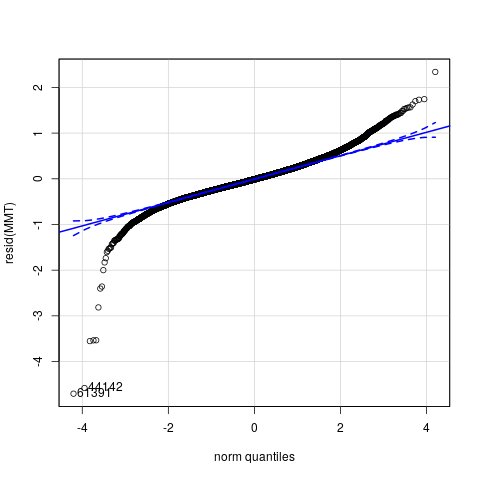

In [2]:
%%R 
library(lme4)
library(xtable)
library(car)
df = read.csv('trimmed_data.csv')

df1 = df[df$exp == 2,]
df2 = df1[df1$trialType == "SA",]
df1 = df1[complete.cases(df1$rt), ]

#Coding
df1$SATcoded <-ifelse(df1$condition=="Speed",-0.5,0.5) #Sum coding
df1$GRcoded<-ifelse(df1$givenResp=="Right",-0.5,0.5)#Sum coding
df1$contraste.c<- (df1$contraste - 0.07)*10 # Centering on mid contrast value and rescaling for ease of slope interpretation
df1$sResponse<-ifelse(df1$response==1,0,1)#Treatment coding

### Log transform
df1$logrt = log(df1$rtMNE)
df1$logpmt = log(df1$pmt)
df1$logmt = log(df1$mt)

### Models + residual check
# Uncomment qqPlot and print(confint()) to see residual QQPlots and CI around estimates

MRT <- lmer(logrt ~ contraste.c * sResponse * SATcoded + GRcoded +
              (contraste.c * sResponse * SATcoded + GRcoded|participant), data=df1, REML=TRUE)
print(summary(MRT))


MPMT <- lmer(logpmt ~ contraste.c * sResponse * SATcoded+ GRcoded  +
               (contraste.c * sResponse * SATcoded + GRcoded|participant), data=df1, REML=TRUE)
print(summary(MPMT))

MMT <- lmer(logmt ~ SATcoded * contraste.c * sResponse+ GRcoded  +
              (contraste.c * sResponse * SATcoded + GRcoded|participant), data=df1, REML=TRUE)
print(summary(MMT))

# GLME on precision

In [3]:
%%R 
MPrec <- glmer(response ~ SATcoded * contraste.c + GRcoded +
                          (SATcoded + GRcoded|participant), family="binomial", data=df1)
print(summary(MPrec))
#print(confint(MPrec, method="Wald"))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: response ~ SATcoded * contraste.c + GRcoded + (SATcoded + GRcoded |  
    participant)
   Data: df1

     AIC      BIC   logLik deviance df.resid 
 31424.1  31518.1 -15701.1  31402.1    37990 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.3828   0.0906   0.2842   0.4934   1.3597 

Random effects:
 Groups      Name        Variance Std.Dev. Corr       
 participant (Intercept) 0.05613  0.2369              
             SATcoded    0.06197  0.2489   -0.51      
             GRcoded     0.07319  0.2705    0.30 -0.04
Number of obs: 38001, groups:  participant, 16

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.73282    0.06240  27.772   <2e-16 ***
SATcoded              0.89172    0.07328  12.169   <2e-16 ***
contraste.c           2.42590    0.03733  64.980   <2e-16 ***
GRcoded        

# Means


In [8]:
means = df[df.response == 1].groupby(["contraste","condition"]).mean().reset_index()

In [9]:
wideRT = pd.pivot_table(means, values='rt', index=['contraste'],
                    columns=['condition'], aggfunc=np.mean).T.round(0).to_latex()
print(wideRT)

\begin{tabular}{lrrr}
\toprule
contraste &   0.01 &   0.07 &   0.15 \\
condition &        &        &        \\
\midrule
Accuracy  &  628.0 &  551.0 &  487.0 \\
Speed     &  407.0 &  393.0 &  366.0 \\
\bottomrule
\end{tabular}



In [10]:
widePMT = pd.pivot_table(means, values='pmt', index=['contraste'],
                    columns=['condition'], aggfunc=np.mean).T.round(0).to_latex()
print(widePMT)

\begin{tabular}{lrrr}
\toprule
contraste &   0.01 &   0.07 &   0.15 \\
condition &        &        &        \\
\midrule
Accuracy  &  545.0 &  470.0 &  408.0 \\
Speed     &  334.0 &  322.0 &  299.0 \\
\bottomrule
\end{tabular}



In [11]:
wideMT = pd.pivot_table(means, values='mt', index=['contraste'],
                    columns=['condition'], aggfunc=np.mean).T.round(0).to_latex()
print(wideMT)

\begin{tabular}{lrrr}
\toprule
contraste &  0.01 &  0.07 &  0.15 \\
condition &       &       &       \\
\midrule
Accuracy  &  82.0 &  81.0 &  79.0 \\
Speed     &  73.0 &  71.0 &  68.0 \\
\bottomrule
\end{tabular}

